In [3]:
from sklearn import svm

In [4]:
import matplotlib.pyplot as plt

In [5]:
x = [[0,0,0],[1,1,-1]]
y = [0,1]

In [6]:
clf = svm.SVC(gamma='auto')
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
clf.predict([[1,0,1]])

array([0])

In [9]:
# get support
clf.support_vectors_

array([[ 0.,  0.,  0.],
       [ 1.,  1., -1.]])

In [10]:
# get indices of support vectors
clf.support_

array([0, 1])

In [11]:
clf.n_support_

array([1, 1])

## SVM - Maximum margin separating hyperplane

In [12]:
import numpy as np
from sklearn.datasets import  make_blobs
#make_blobs()

In [13]:
# we create 48 separable points
x,y =make_blobs(n_samples=40,centers=2,random_state=6)
x.mean()

0.5492554089596565

In [14]:
x[0:5]

array([[  6.37734541, -10.61510727],
       [  6.50072722,  -3.82403586],
       [  4.29225906,  -8.99220442],
       [  7.39169472,  -3.1266933 ],
       [  7.64306311, -10.02356892]])

In [15]:
y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [16]:
clf = svm.SVC(kernel='linear')
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
clf.decision_function(x)

array([ 4.06514436, -1.65754273,  3.23460104, -2.46824087,  3.24794096,
       -1.61411642, -2.52439359, -2.30688147, -1.15108112, -2.52706281,
        2.22684315,  1.9169427 , -3.9997802 ,  3.36587918,  2.23603428,
       -3.56323869, -0.99973162,  4.01793201, -3.3852309 , -1.40793786,
        1.87662501,  1.00026702,  3.57559224,  2.27088304, -2.40126618,
       -2.79232517,  2.95612787,  3.84751299, -1.69242637,  1.84782838,
        0.99946429,  2.60194582,  3.28813056, -3.39869623, -3.23105836,
       -2.44665765, -3.34260134,  2.92408634, -2.27992936,  3.44404718])

In [18]:
clf.support_ # decision line

array([16, 21, 30])

In [19]:
clf.support_vectors_ # +d, -d

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

In [20]:
clf.coef0

0.0

In [21]:
clf.coef_

array([[-0.2539717 , -0.83806387]])

In [22]:
clf.classes_

array([0, 1])

svm.SVC.<tab>

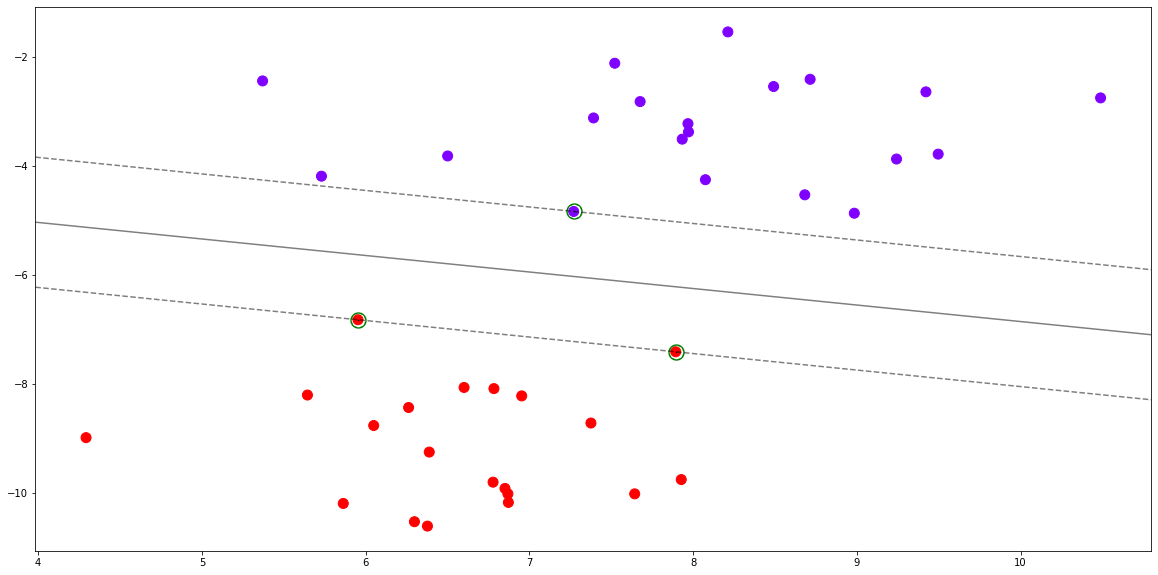

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(x[:,0],x[:,1], 
            c= y, s=100, # c= y is target and s = size of data samples
            cmap=plt.cm.rainbow)

## plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
yy,xx = np.meshgrid(yy,xx)

xy = np.vstack([xx.ravel(),yy.ravel()]).T
z = clf.decision_function(xy).reshape(xx.shape)

# plot decision boundary and margins lines
ax.contour(xx,yy,z,
          colors = 'k',
          levels = [-1,0,1],
          alpha= 0.5,
          linestyles= ['--','-','--'])

ax.scatter(clf.support_vectors_[:,0],
          clf.support_vectors_[:,1],
          s=2,
          linewidth= 15,
          facecolors='k',
          edgecolors='g')


## Brest cancer dataset

In [24]:
from sklearn.datasets import load_breast_cancer

In [25]:
cancer = load_breast_cancer()

In [26]:
x = cancer.data

In [27]:
y = cancer.target

In [28]:
clm = svm.SVC(kernel='linear')
clm.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
clm.decision_function(x)

array([-1.69979151e+01, -7.25803955e+00, -8.92824400e+00, -1.32327624e+00,
       -5.67517729e+00, -8.44413139e-01, -6.81160238e+00, -2.20259324e+00,
       -1.88505830e+00, -4.31107777e+00, -3.20253927e+00, -5.72828951e+00,
       -5.44119445e+00,  2.44234633e-01, -1.72459066e+00, -5.24913334e+00,
       -3.92317373e+00, -6.57500357e+00, -1.61380744e+01,  2.59510289e+00,
        3.08891585e+00,  6.68879595e+00, -2.45344326e+00, -1.55348021e+01,
       -1.63741517e+01, -9.44446599e+00, -3.49973580e+00, -5.72867157e+00,
       -8.87733253e+00, -2.23143040e+00, -1.23113068e+01, -5.02564796e+00,
       -6.82948445e+00, -1.01494661e+01, -4.61287407e+00, -4.66281661e+00,
       -1.61144594e+00,  6.35572271e+00,  6.58850748e-01, -3.55386436e-01,
       -3.60186254e-02, -1.09173954e-01, -1.24857024e+01, -2.42184129e+00,
       -7.50444285e-01, -7.00064086e+00,  5.83842627e+00, -8.71506832e-01,
        2.76890279e+00,  8.46225736e-01,  3.35819385e+00,  3.48876537e+00,
        4.05443786e+00, -

In [30]:
clm.support_vectors_

array([[1.142e+01, 2.038e+01, 7.758e+01, ..., 2.575e-01, 6.638e-01,
        1.730e-01],
       [1.245e+01, 1.570e+01, 8.257e+01, ..., 1.741e-01, 3.985e-01,
        1.244e-01],
       [1.585e+01, 2.395e+01, 1.037e+02, ..., 1.119e-01, 2.809e-01,
        6.287e-02],
       ...,
       [1.447e+01, 2.499e+01, 9.581e+01, ..., 1.205e-01, 3.187e-01,
        1.023e-01],
       [1.474e+01, 2.542e+01, 9.470e+01, ..., 1.095e-01, 2.722e-01,
        6.956e-02],
       [1.405e+01, 2.715e+01, 9.138e+01, ..., 1.048e-01, 2.250e-01,
        8.321e-02]])

In [31]:
clm.support_

array([  3,   5,  13,  38,  39,  40,  41,  44,  47,  73,  86,  91,  99,
       135, 146, 194, 205, 213, 215, 255, 263, 277, 297, 329, 385, 479,
       489, 536,  90, 112, 147, 157, 204, 208, 225, 228, 238, 290, 291,
       340, 347, 363, 377, 410, 413, 421, 448, 455, 465, 466, 476, 481,
       491, 500, 541, 542, 560])

In [32]:
clm.coef0

0.0

In [33]:
clm.coef_

array([[ 1.16995572e+00,  4.00636878e-02, -6.13184907e-02,
        -1.17369683e-03, -2.92915625e-01, -2.45404551e-01,
        -6.84025339e-01, -4.19383398e-01, -4.16082695e-01,
        -1.74855622e-02, -4.58226777e-02,  9.87518093e-01,
         4.34215099e-01, -8.69318027e-02, -5.48016663e-02,
         7.62211368e-02, -7.62536863e-02, -6.67865961e-02,
        -5.06591199e-02,  1.99425665e-02, -8.74038776e-02,
        -2.33147717e-01, -1.00730718e-01, -2.28192434e-03,
        -5.19330114e-01, -5.87102366e-01, -1.59991161e+00,
        -7.59787572e-01, -1.02807960e+00, -6.39312969e-02]])

In [34]:
clm.classes_

array([0, 1])

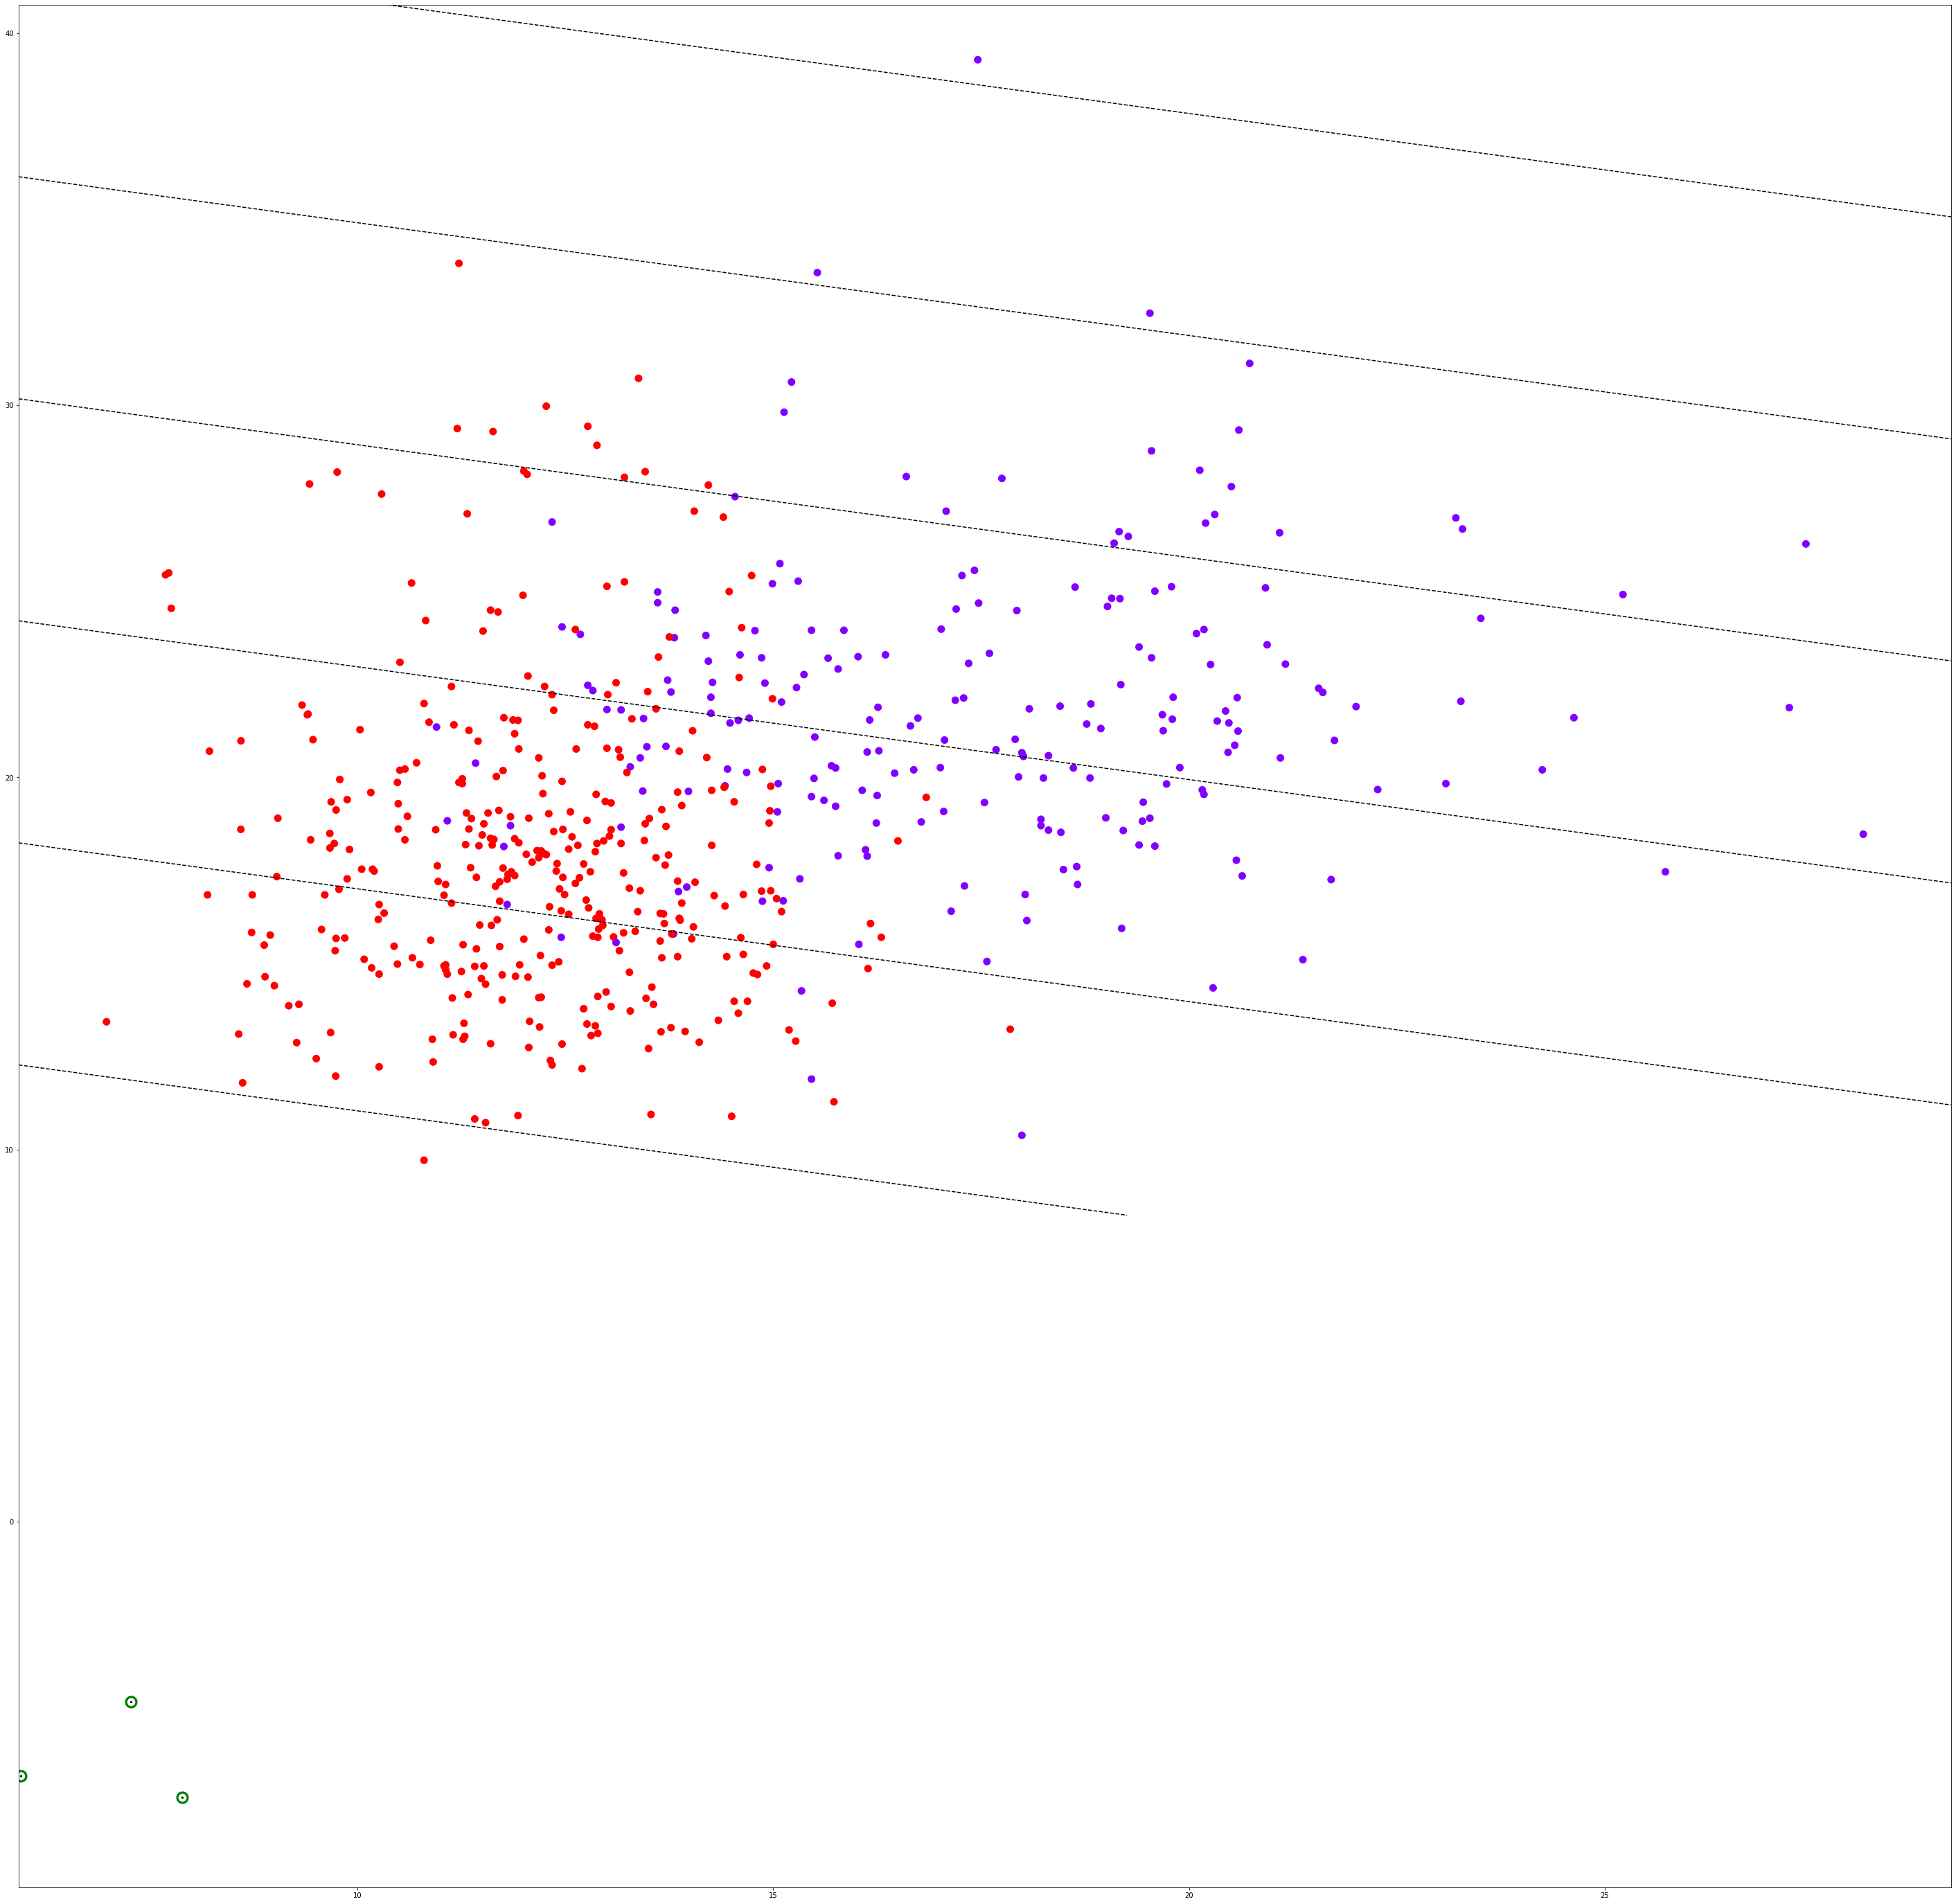

In [37]:
plt.figure(figsize=(50,50))
plt.scatter(x[:,0],x[:,1], 
            c= y, s=100, # c= y is target and s = size of data samples
            cmap=plt.cm.rainbow)

## plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
yy,xx = np.meshgrid(yy,xx)

xy = np.vstack([xx.ravel(),yy.ravel()]).T
z = clf.decision_function(xy).reshape(xx.shape)

# plot decision boundary and margins lines
ax.contour(xx,yy,z,
          colors = 'k',
          )

ax.scatter(clf.support_vectors_[:,0],
          clf.support_vectors_[:,1],
          s=10,
          linewidth= 15,
          facecolors='k',
          edgecolors='g')

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
i = iris.data
i

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y = iris.target

In [6]:
import seaborn as sns
import pandas as pd

In [7]:
df = pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df['species']= iris.target
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


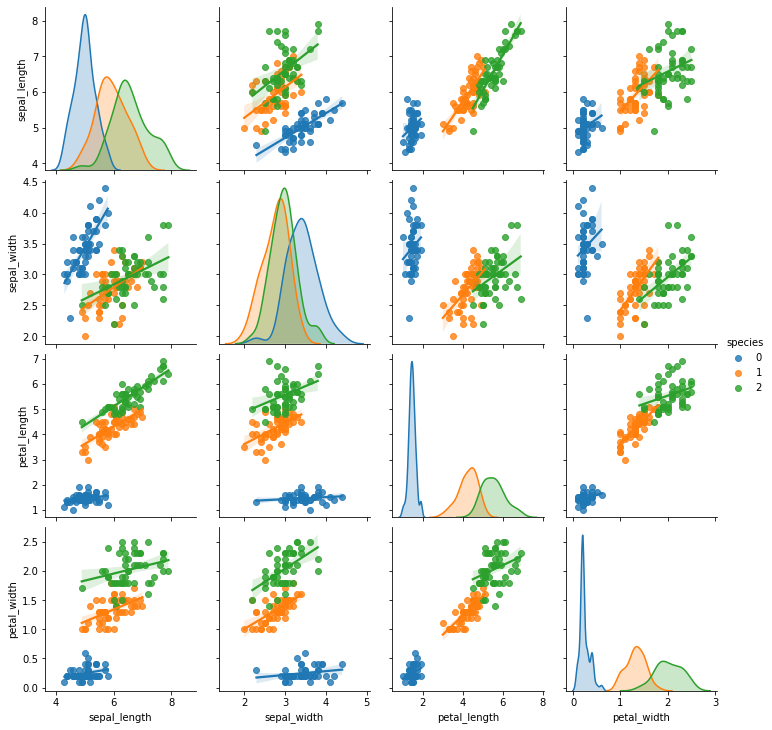

In [66]:
sns.pairplot(df,hue="species",kind="reg")

In [13]:
X = iris.data
y = iris.target

In [14]:
X = X[y!=0,:2]
X

array([[7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [5.5, 2.3],
       [6.5, 2.8],
       [5.7, 2.8],
       [6.3, 3.3],
       [4.9, 2.4],
       [6.6, 2.9],
       [5.2, 2.7],
       [5. , 2. ],
       [5.9, 3. ],
       [6. , 2.2],
       [6.1, 2.9],
       [5.6, 2.9],
       [6.7, 3.1],
       [5.6, 3. ],
       [5.8, 2.7],
       [6.2, 2.2],
       [5.6, 2.5],
       [5.9, 3.2],
       [6.1, 2.8],
       [6.3, 2.5],
       [6.1, 2.8],
       [6.4, 2.9],
       [6.6, 3. ],
       [6.8, 2.8],
       [6.7, 3. ],
       [6. , 2.9],
       [5.7, 2.6],
       [5.5, 2.4],
       [5.5, 2.4],
       [5.8, 2.7],
       [6. , 2.7],
       [5.4, 3. ],
       [6. , 3.4],
       [6.7, 3.1],
       [6.3, 2.3],
       [5.6, 3. ],
       [5.5, 2.5],
       [5.5, 2.6],
       [6.1, 3. ],
       [5.8, 2.6],
       [5. , 2.3],
       [5.6, 2.7],
       [5.7, 3. ],
       [5.7, 2.9],
       [6.2, 2.9],
       [5.1, 2.5],
       [5.7, 2.8],
       [6.3, 3.3],
       [5.8, 2.7],
       [7.1,

In [69]:
y = y[y!=0]
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
no_of_samples = len(X)
np.random.seed(0)
order = np.random.permutation(no_of_samples)
X = X[order]
y = y[order].astype(np.float)

In [77]:
X_train = X[:int(.9 * no_of_samples)]
y_train = y[:int(.9 * no_of_samples)]
X_test = X[int(.9 * no_of_samples):]
y_test = y[int(.9 * no_of_samples):]

My kernel is linear


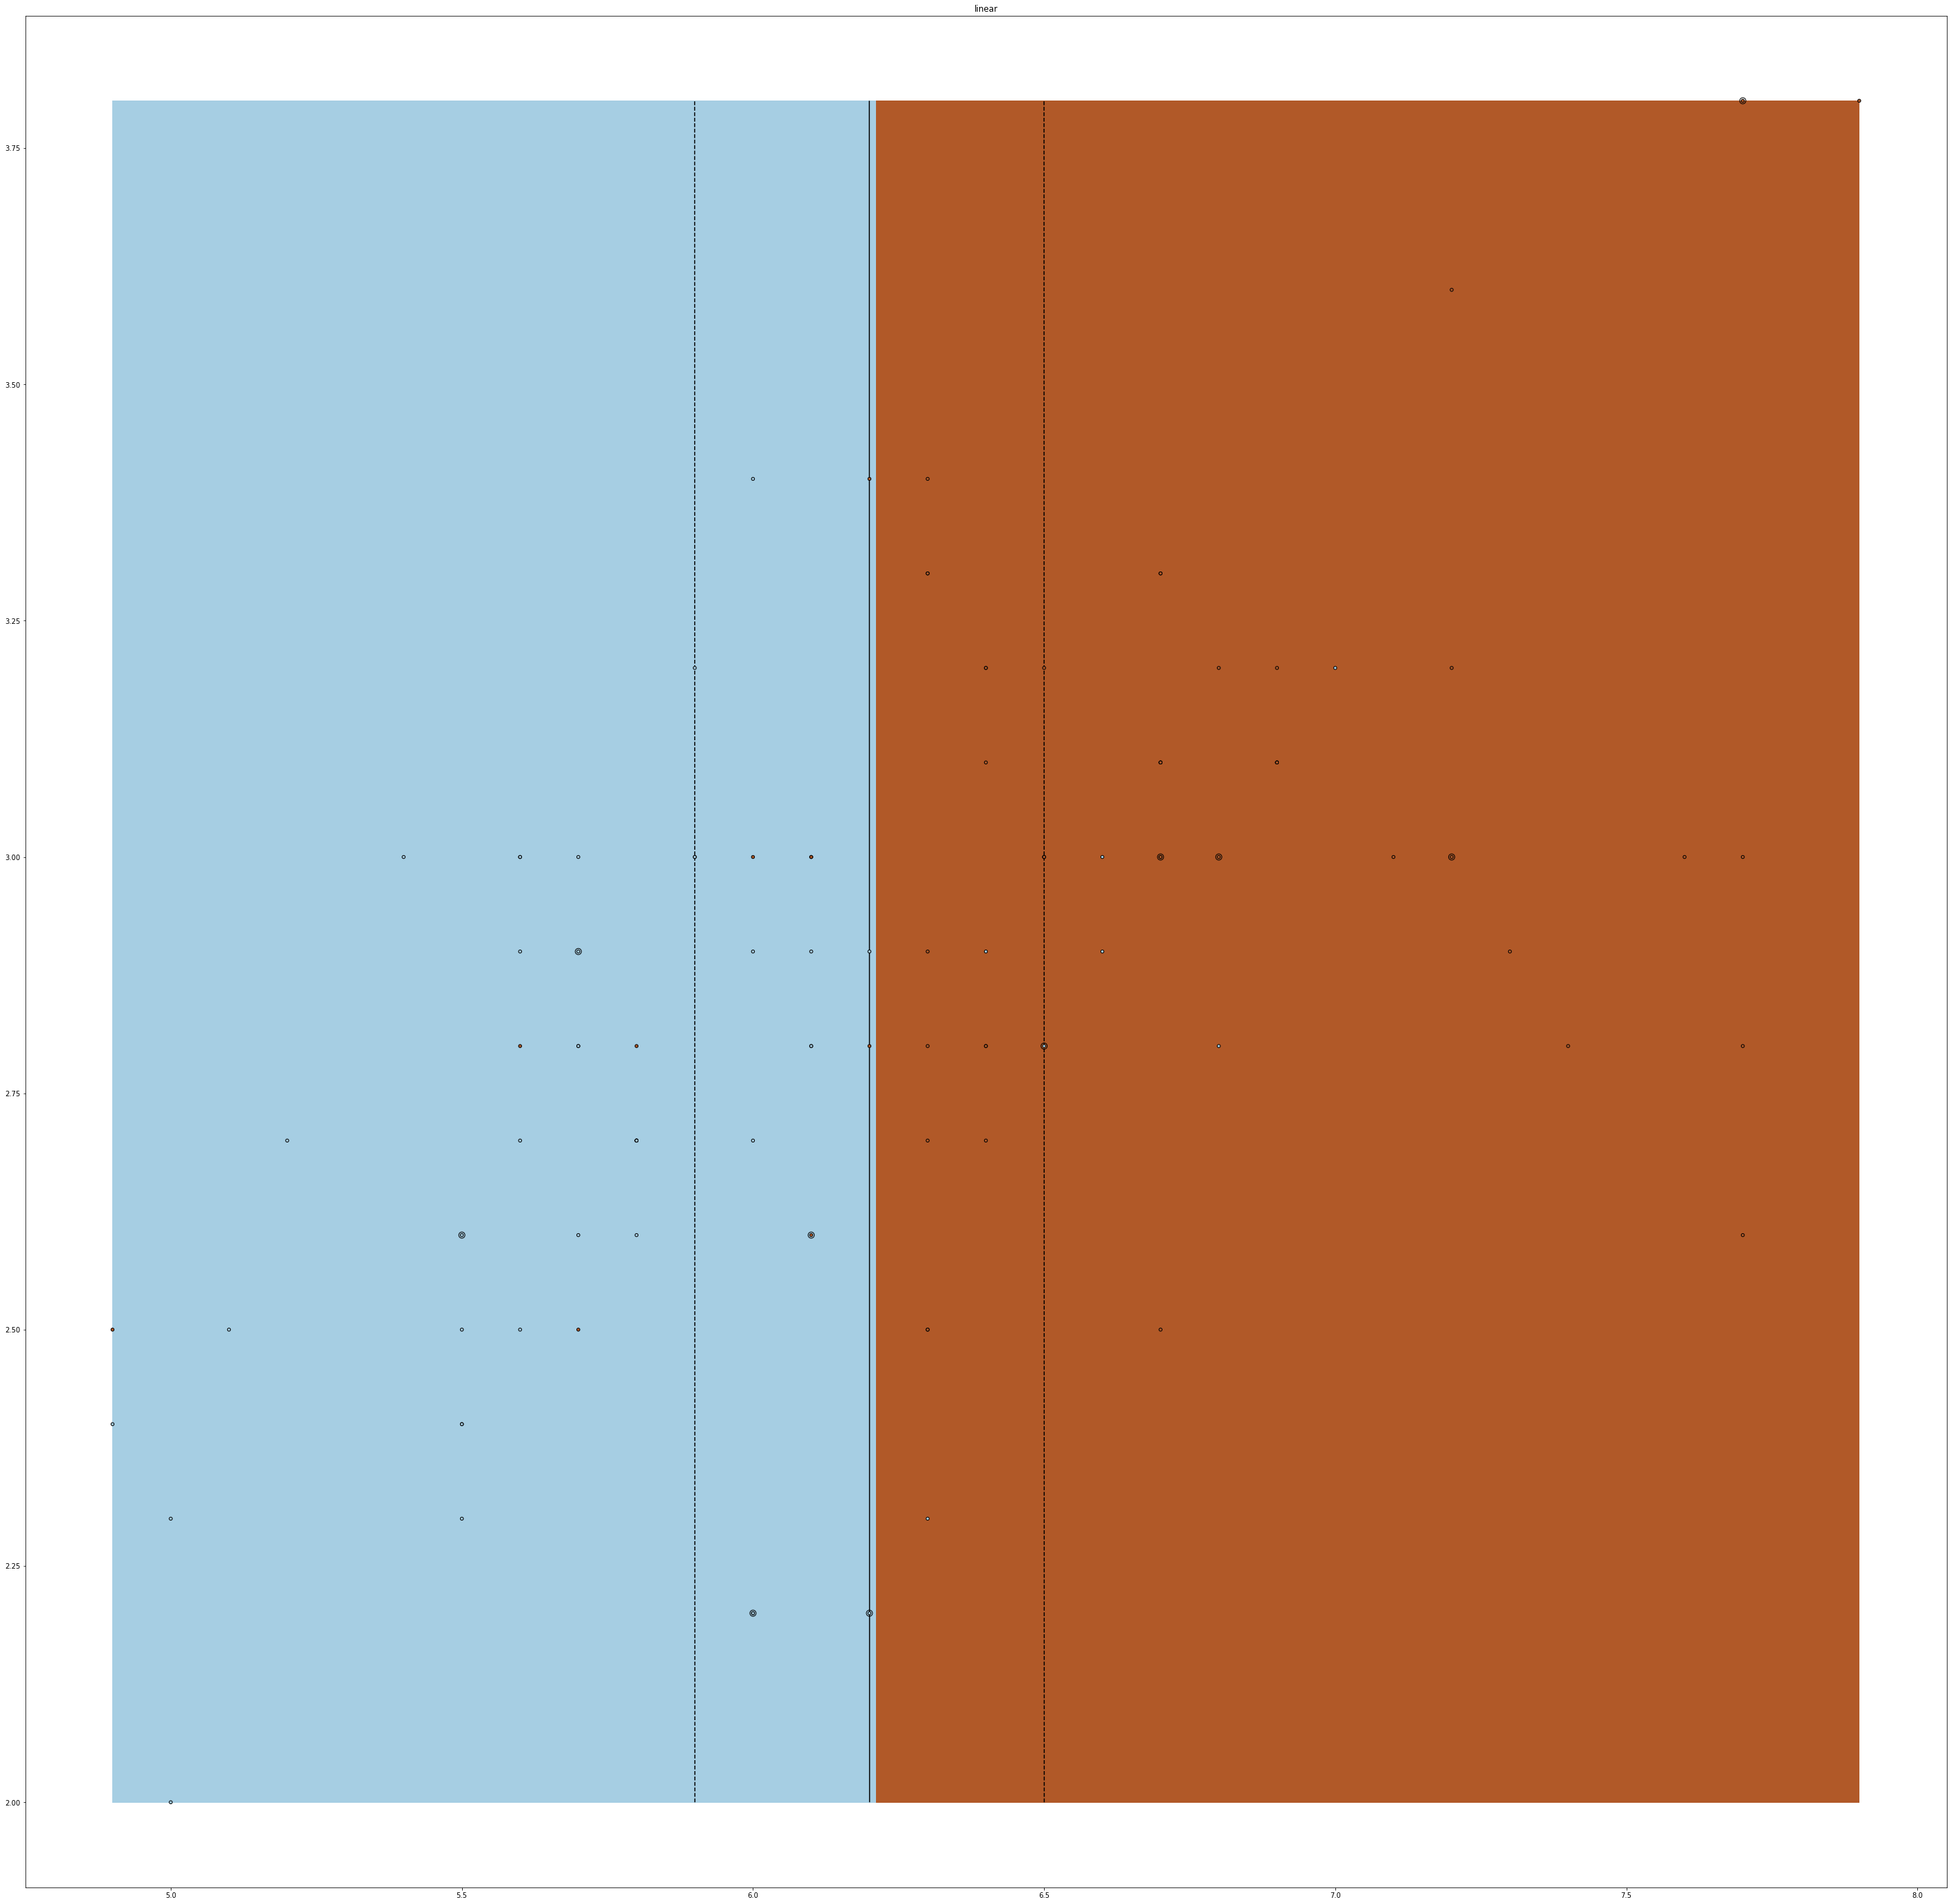

My kernel is rbf


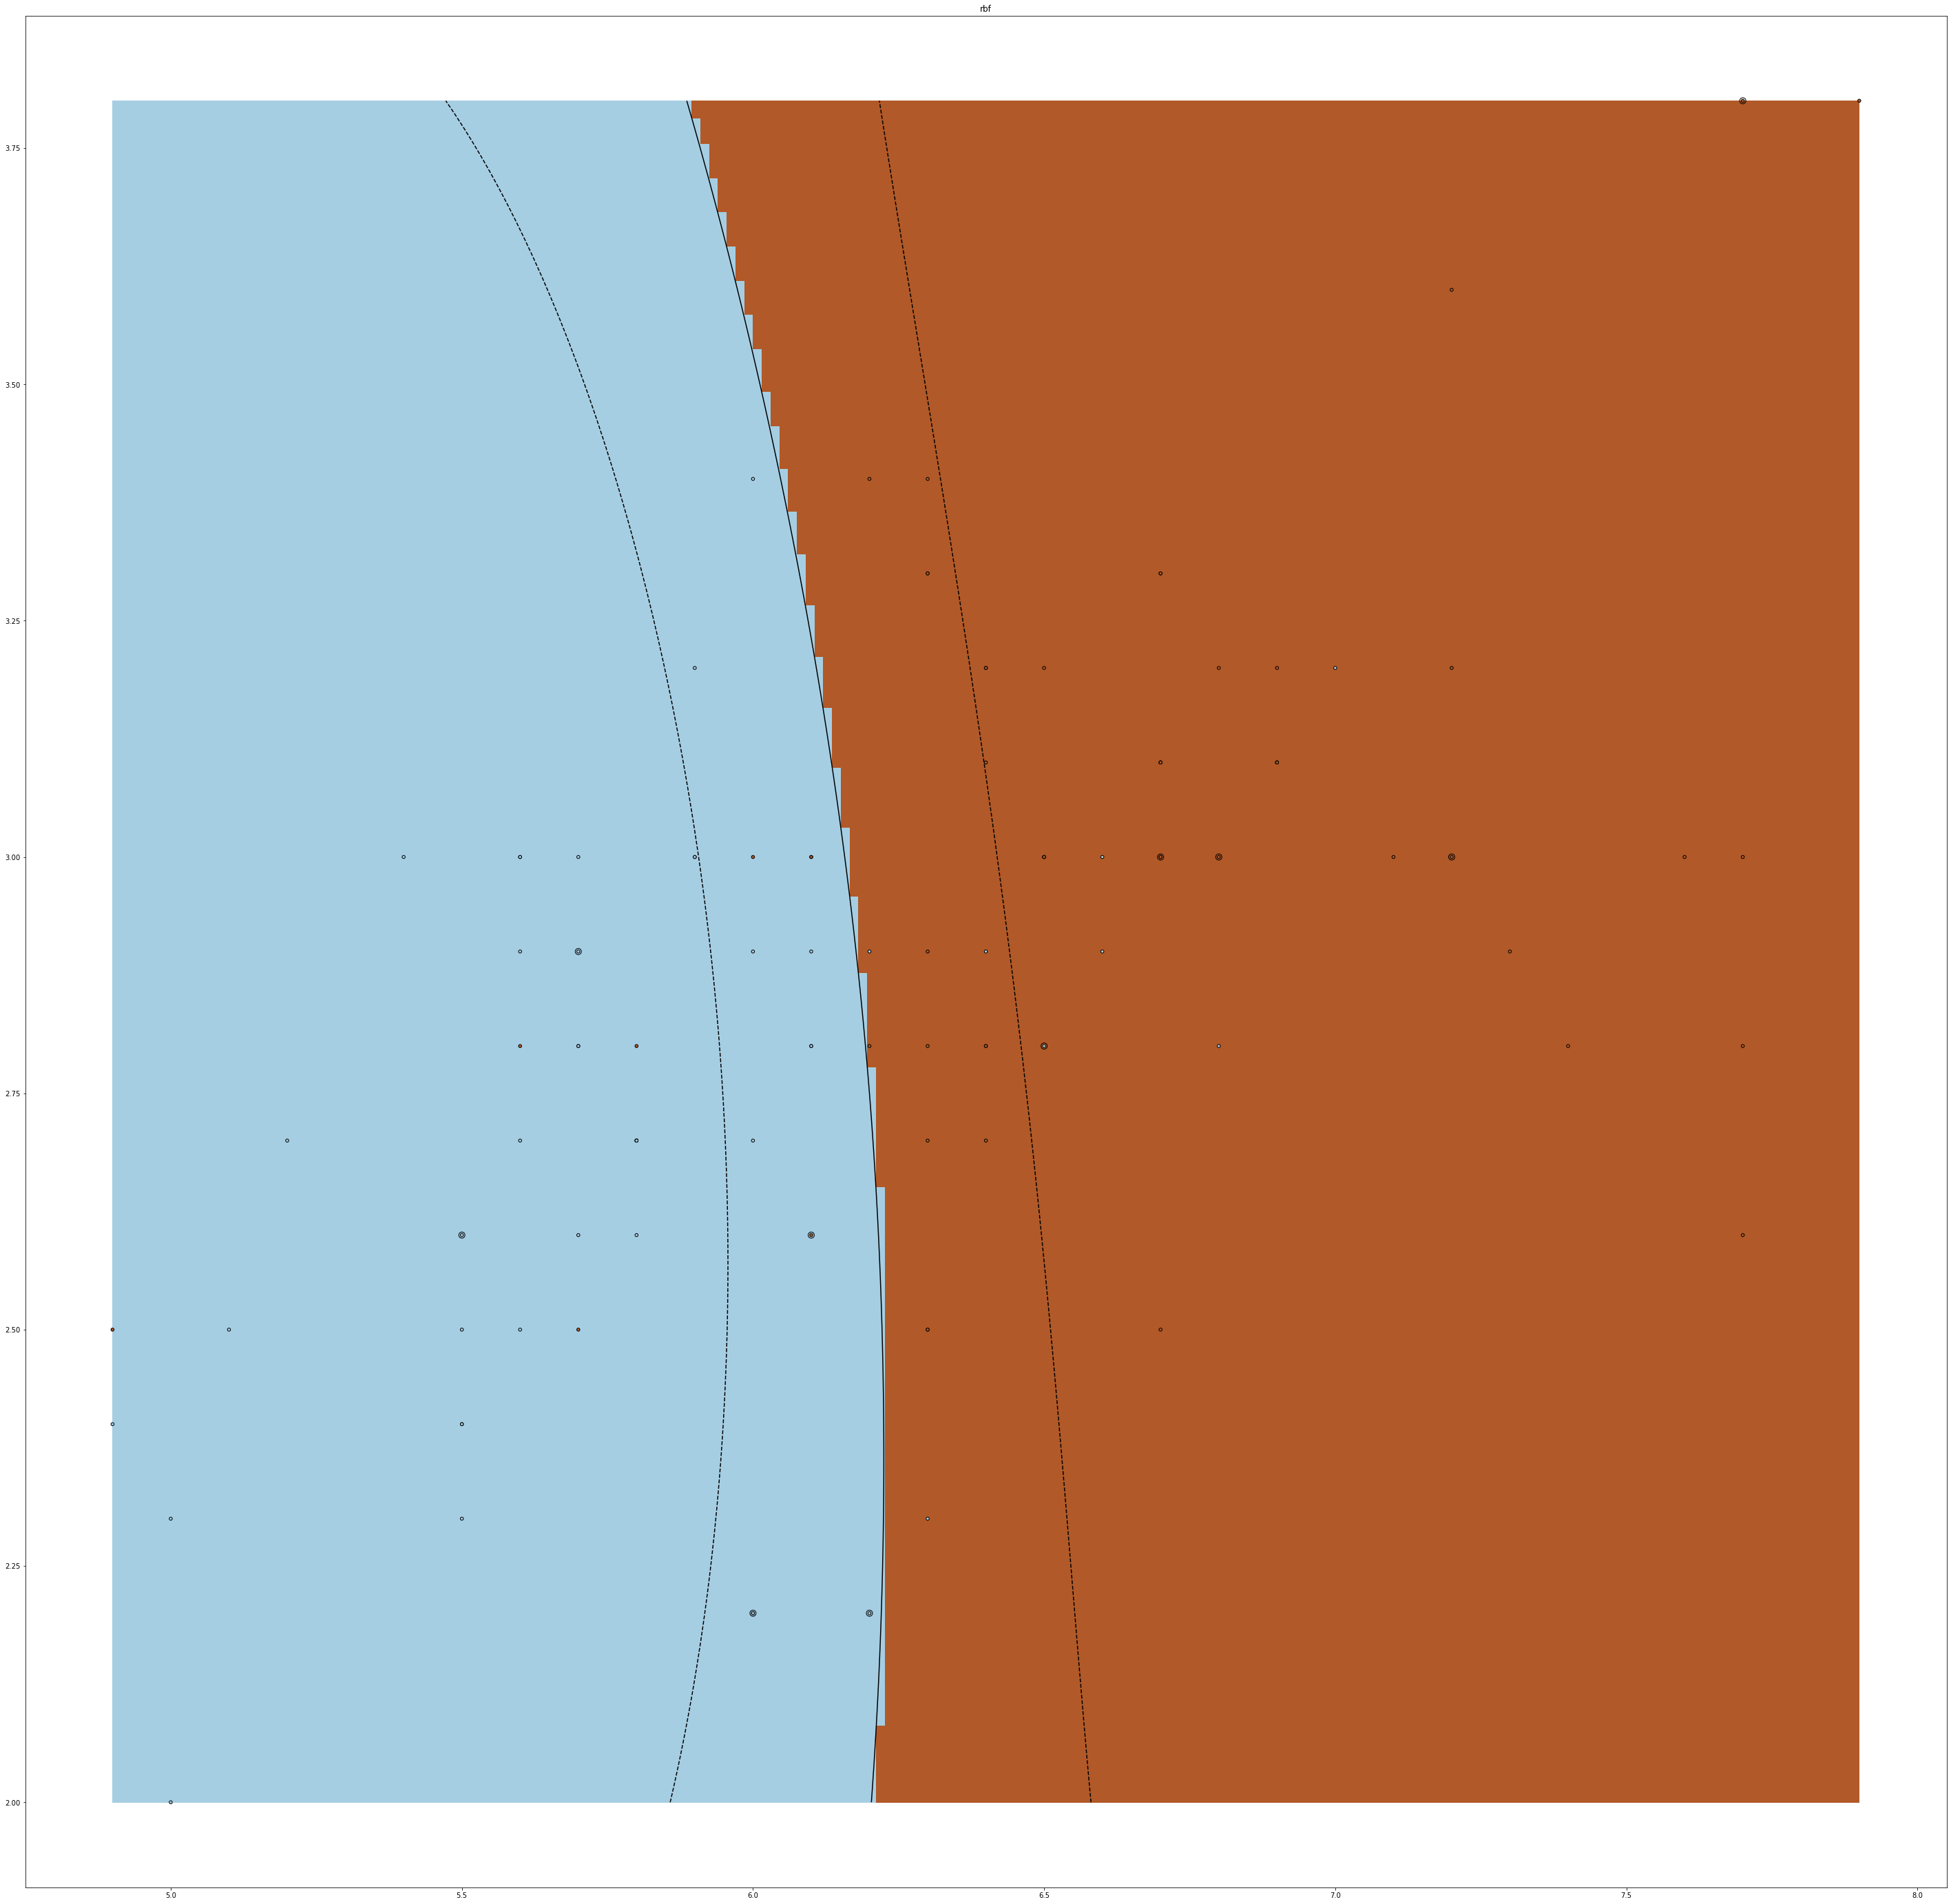

My kernel is poly


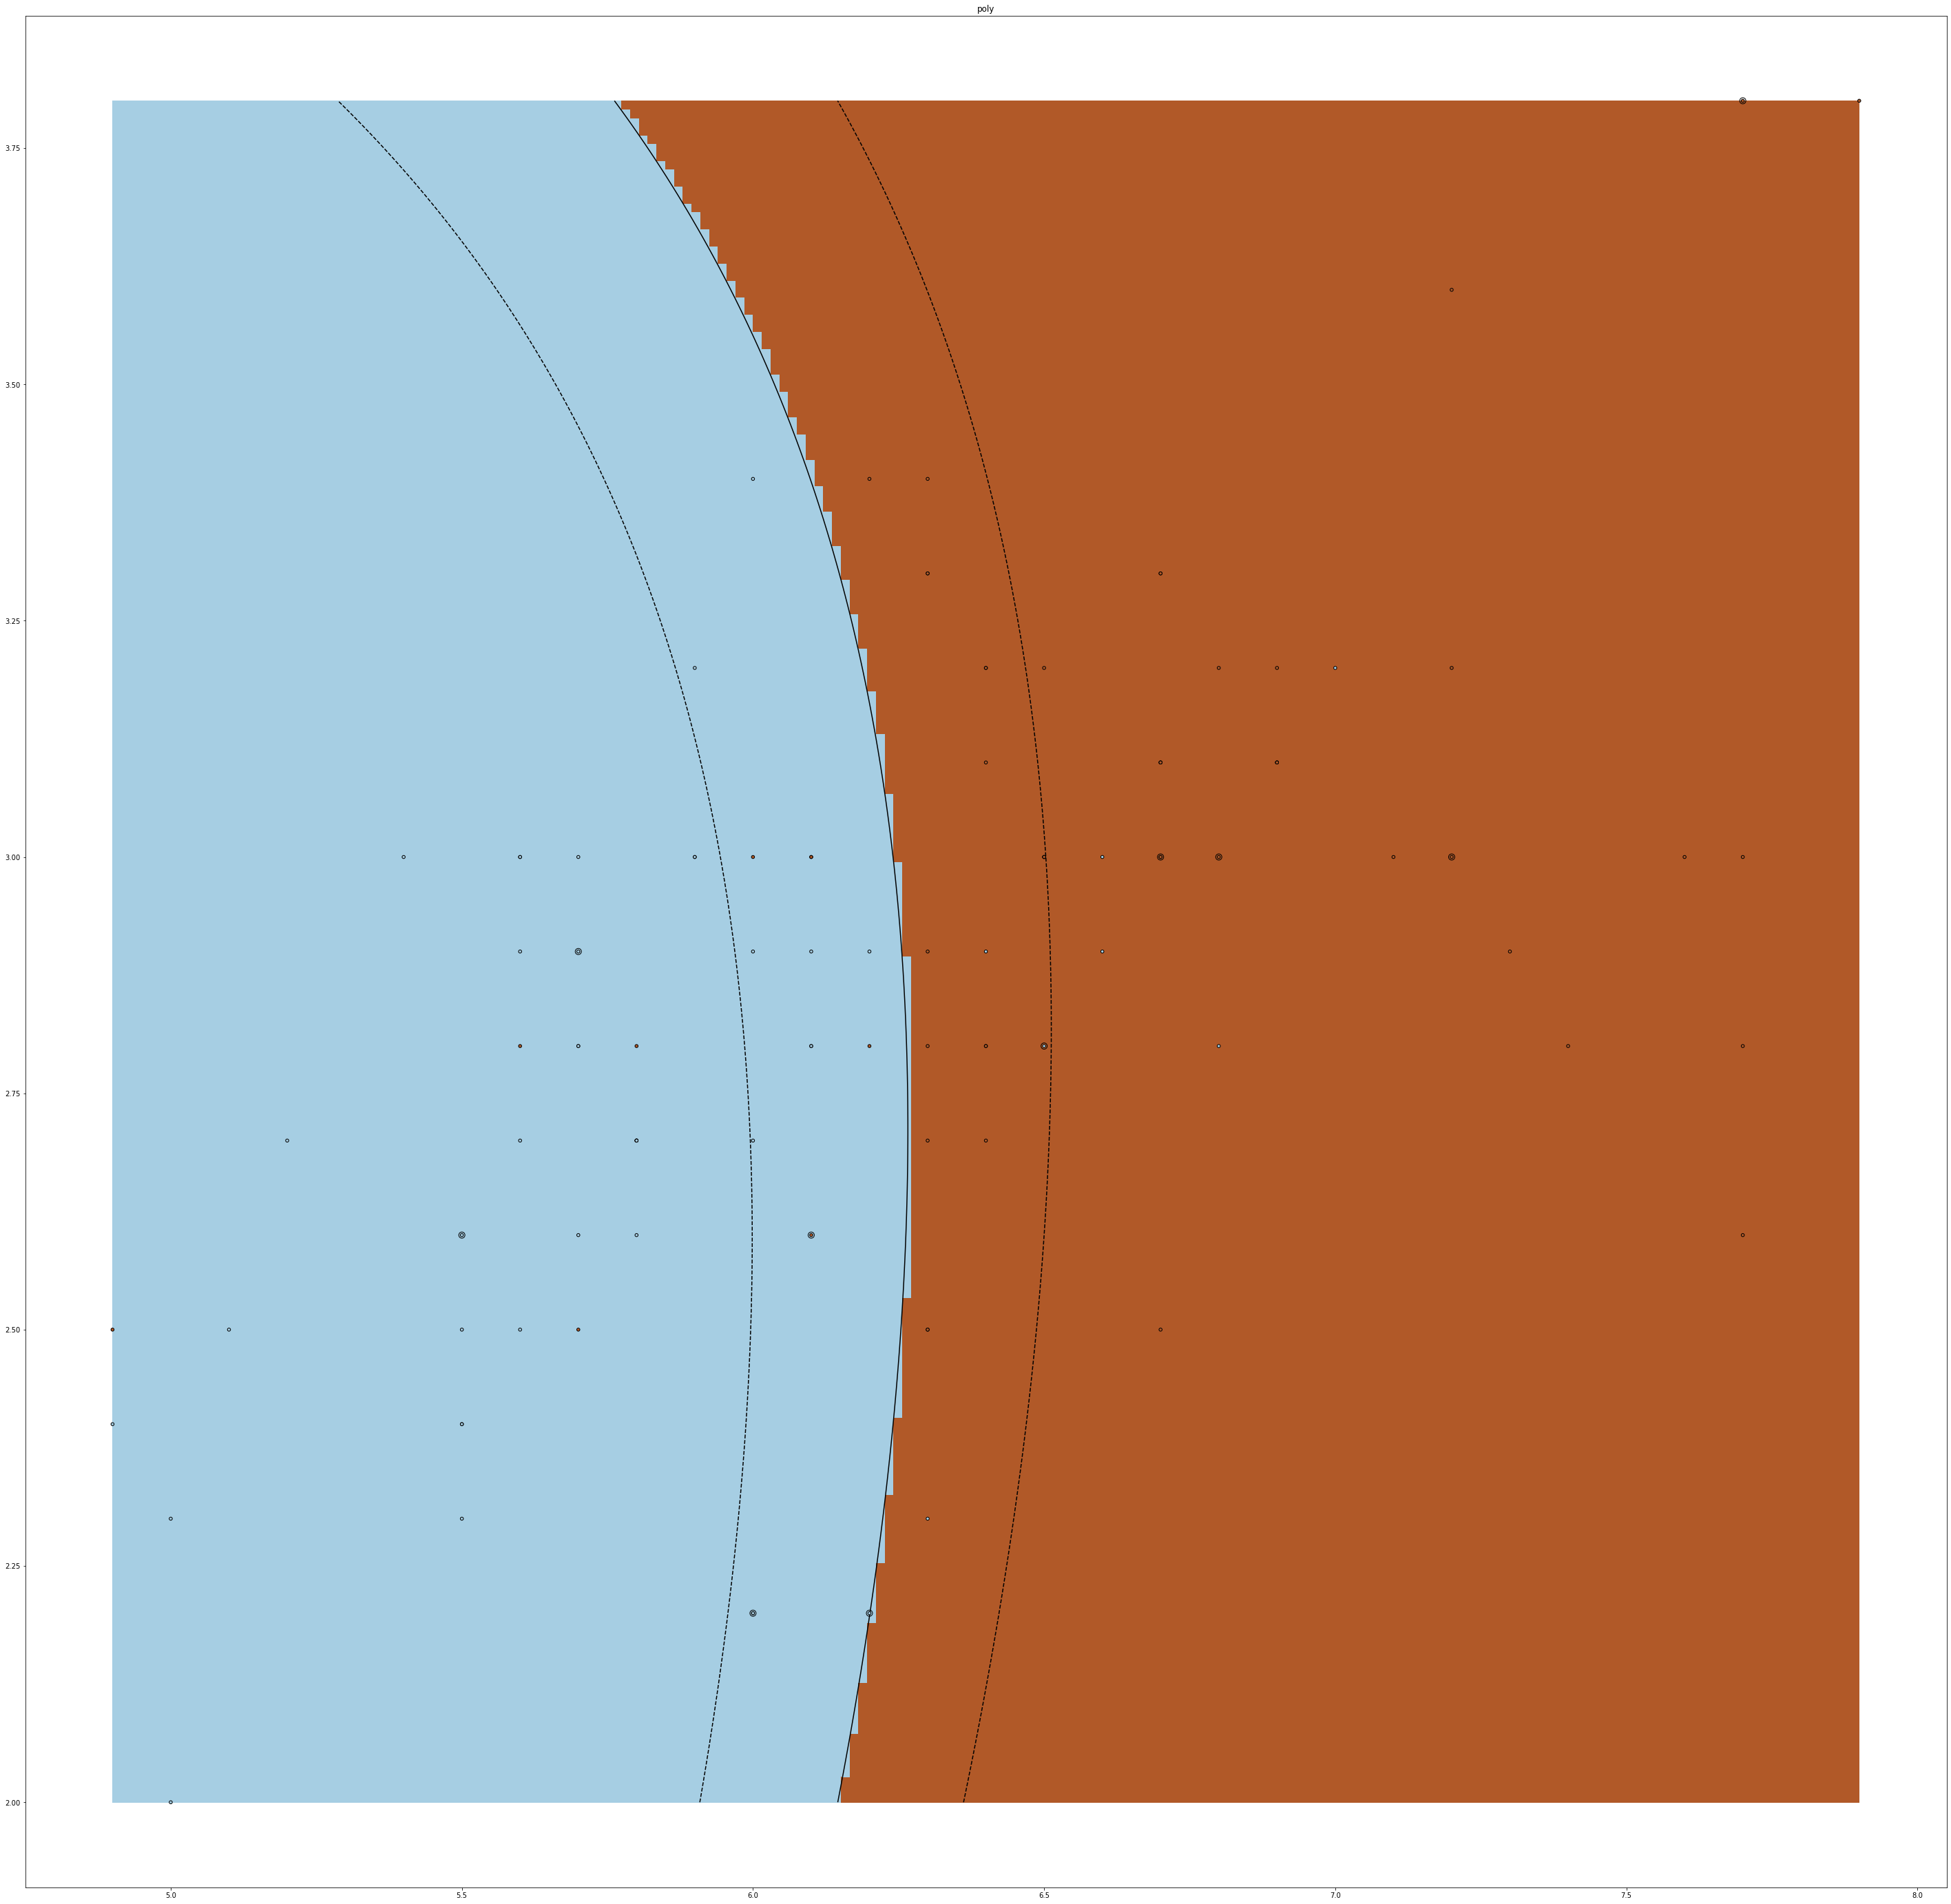

My kernel is sigmoid


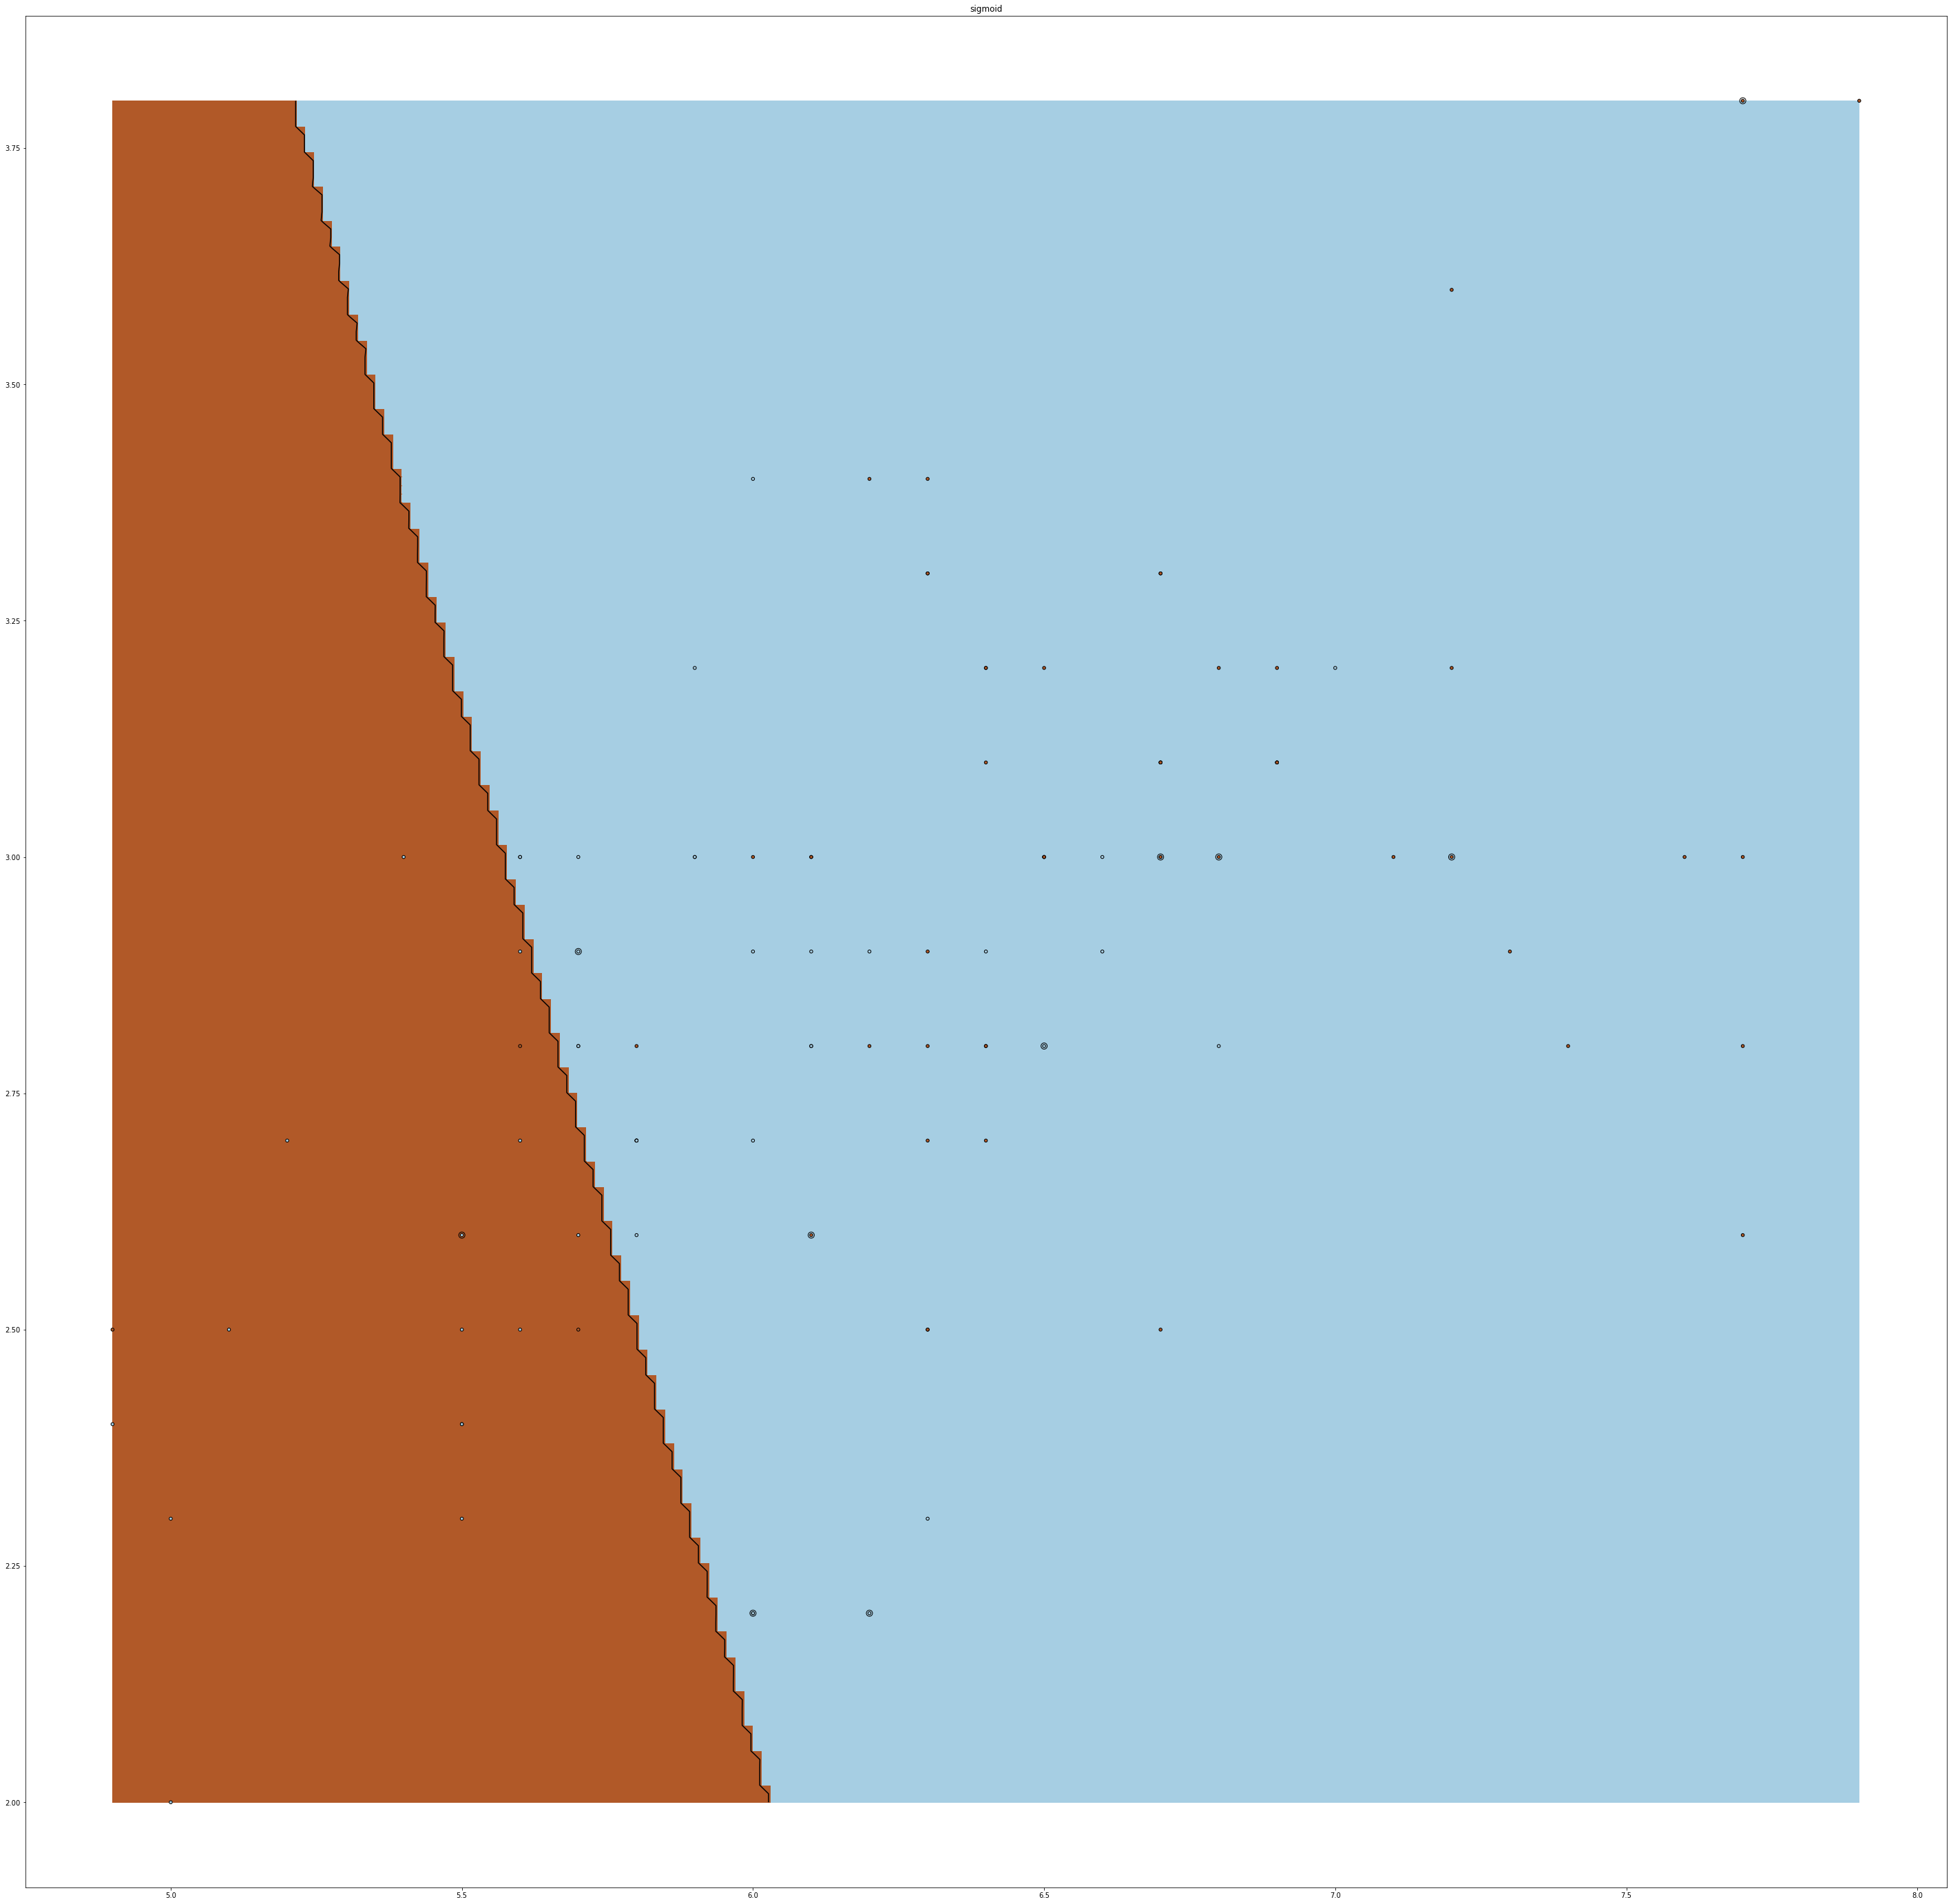

In [90]:
for kernel in ("linear","rbf","poly","sigmoid"):
    clf = svm.SVC(kernel=kernel,gamma='auto')
    clf.fit(X_train,y_train)
    print("My kernel is",kernel)
    # print("coef of each kernel is",clf.coef_)
    plt.figure(figsize=(50,50))
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], 
                s=80, facecolors='none',
                zorder=10, edgecolor='k')
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    XX,YY = np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
    z = clf.decision_function(np.c_[XX.ravel(),YY.ravel()])
    z= z.reshape(XX.shape)
    
    plt.pcolormesh(XX, YY, z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
    plt.show()

In [42]:
clf = svm.SVC(kernel='linear')
clf.fit(i,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
clf.coef0

0.0

In [44]:
clf.coef_

array([[-0.04625854,  0.5211828 , -1.00304462, -0.46412978],
       [-0.00722313,  0.17894121, -0.53836459, -0.29239263],
       [ 0.59549776,  0.9739003 , -2.03099958, -2.00630267]])

In [45]:
clf.support_

array([ 23,  24,  41,  52,  56,  63,  66,  68,  70,  72,  76,  77,  83,
        84,  98, 106, 110, 119, 123, 126, 127, 129, 133, 138, 146, 147,
       149])

In [46]:
clf.support_vectors_

array([[5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [6.9, 3.1, 4.9, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [6.2, 2.2, 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [4.9, 2.5, 4.5, 1.7],
       [6.5, 3.2, 5.1, 2. ],
       [6. , 2.2, 5. , 1.5],
       [6.3, 2.7, 4.9, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [7.2, 3. , 5.8, 1.6],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 3. , 4.8, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [5.9, 3. , 5.1, 1.8]])

In [47]:
clf.classes_

array([0, 1, 2])